In [1]:
pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf

In [4]:
df = yf.download('IBM',
                 start='2021-01-01',
                 end='2022-01-31')

[*********************100%%**********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,120.315491,120.382408,117.629066,118.489487,101.472206,5417443
2021-01-05,119.512428,121.108986,119.130020,120.592735,103.273376,6395872
2021-01-06,121.319313,126.080307,121.147224,123.604210,105.852356,8322708
2021-01-07,124.321220,124.722755,122.619499,123.317398,105.606735,4714740
2021-01-08,122.915871,123.632889,121.395790,122.877632,105.230133,4891305
...,...,...,...,...,...,...
2022-01-24,127.989998,129.149994,124.190002,128.820007,115.869583,13484000
2022-01-25,129.139999,137.339996,128.300003,136.100006,122.417725,19715700
2022-01-26,136.470001,137.070007,133.130005,134.259995,120.762688,8336000


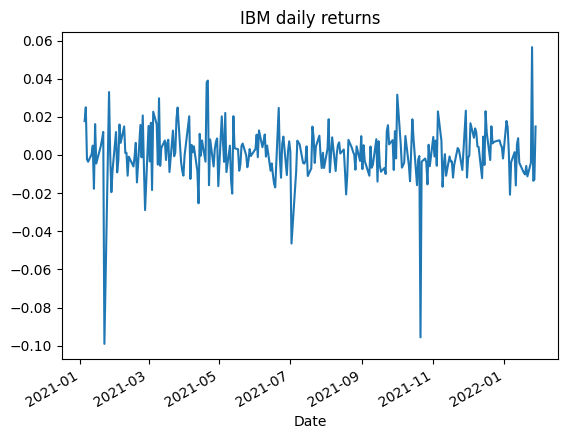

In [7]:
# calculate and plot daily returns
returns = df['Adj Close'].pct_change().dropna()
returns.plot(title='IBM daily returns');

In [8]:
# split in train / test

train = returns["2021"]
test = returns["2022"]

In [10]:
# set parameters for simulation

T = len(test) # test
N = len(test) # number of steps in simulation
S_0 = df.loc[train.index[-1], 'Adj Close'] # initial stock price
N_SIM = 100 # setting the number of simulations
mu = train.mean() # expected return of stock
sigma = train.std() # volatility of the stock

In [15]:
# define the function of the simulation

def simulate_gbm(S_0, mu, sigma, n_sims, T, N, random_seed=42):
  np.random.seed(random_seed)
  dt = T/N
  dW = np.random.normal(scale=np.sqrt(dt), size=(n_sims, N))
  W = np.cumsum(dW, axis=1)
  time_step = np.linspace(dt, T, N)
  time_steps = np.broadcast_to(time_step, (n_sims, N))
  s_t = (S_0 * np.exp((mu - 0.5 * sigma**2) * time_steps + sigma * W))
  s_t = np.insert(s_t, 0, S_0, axis=1)
  return s_t

In [16]:
# run simulation and store results in dataframe

gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)
sim_df = pd.DataFrame(np.transpose(gbm_simulations), index=train.index[-1:].union(test.index))

In [17]:
sim_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-31,120.223022,120.223022,120.223022,120.223022,120.223022,120.223022,120.223022,120.223022,120.223022,120.223022,...,120.223022,120.223022,120.223022,120.223022,120.223022,120.223022,120.223022,120.223022,120.223022,120.223022
2022-01-03,121.168090,117.882701,118.025572,119.770080,120.455429,117.795805,119.971774,121.127755,119.132276,118.899573,...,122.237718,123.531365,120.633405,120.000238,119.770086,117.591387,120.597059,120.465486,121.686994,123.136042
2022-01-04,121.009090,120.478625,118.440868,120.424348,120.019246,118.379368,120.575538,119.615748,119.612408,118.848174,...,122.108755,123.218001,122.467847,120.294829,118.560242,118.124611,121.449242,120.824968,118.741894,121.048797
2022-01-05,122.225760,120.169007,119.788194,122.210727,120.259421,118.905769,120.597004,122.398296,120.199695,119.514421,...,118.427956,122.682908,117.872257,121.336118,119.187151,119.073774,119.638318,119.130902,121.075185,120.101890
2022-01-06,125.020579,120.367474,120.165573,121.452695,116.945652,118.995156,118.664957,121.107662,119.050301,120.072900,...,119.963196,122.731771,119.109150,121.494648,121.592399,116.472235,122.176603,121.404283,118.291354,120.137639
2022-01-07,124.684248,118.003193,120.046977,121.210573,116.655368,118.674294,120.715654,120.629066,122.374981,121.594024,...,119.122746,122.279999,118.072619,124.580955,118.433422,118.063044,122.086010,119.980785,120.144665,120.705061
2022-01-10,124.348852,117.161198,119.608663,119.375812,117.336286,116.358982,122.112533,122.133200,123.296335,121.699256,...,119.048224,123.780520,115.078867,123.552703,118.710185,117.324173,122.201956,121.749911,122.192571,119.386975
2022-01-11,127.295158,117.428050,117.168527,117.416777,119.941324,115.734744,123.595141,120.068979,121.281524,124.357529,...,119.699783,121.014933,116.007696,123.983424,118.517085,117.652149,123.538240,122.584208,120.369580,120.199656
2022-01-12,128.796919,115.576199,116.038940,118.879159,119.130284,115.243104,122.069976,120.544566,122.516571,123.968520,...,120.109967,119.273528,118.405386,122.748138,119.749475,120.497041,124.037849,121.531169,119.740776,119.463275


In [18]:
# create df with avg value for each time step and actual stock price

res_df = sim_df.mean(axis=1).to_frame()
res_df = res_df.join(df['Adj Close'])
res_df.columns = ['simulation_avg', 'adj_close_price']

In [19]:
res_df

,simulation_avg,adj_close_price
Date,,
2021-12-31,120.223022,120.223022
2022-01-03,120.466655,122.363731
2022-01-04,120.665605,124.144699
2022-01-05,120.761627,124.324608
2022-01-06,121.114331,121.734131
2022-01-07,121.493461,121.275391
2022-01-10,121.457278,121.455284
2022-01-11,121.620989,119.512436
2022-01-12,121.976435,120.160042


<Axes: title={'center': "Simulation's results"}, xlabel='Date'>

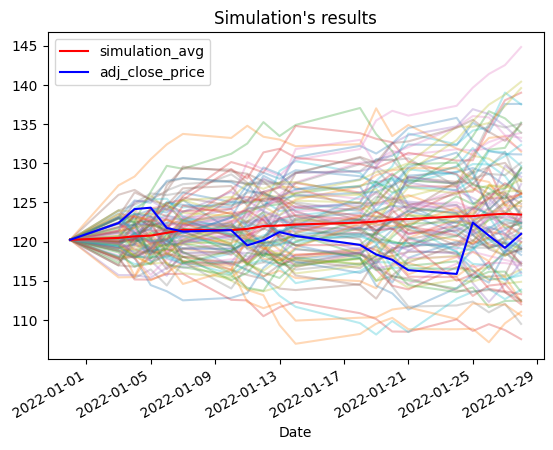

In [20]:
ax = sim_df.plot(
    alpha=0.3, legend=False, title="Simulation's results"
)
res_df.plot(ax=ax, color = ["red", "blue"])


the predicted stock prices (the averages of the simulations for each time step) exhibit a slightly positive trend. That could be attributed to the positive drift term  = 0.07%